In [3]:
# Installing required packages
! pip install PyMySQL
! pip install ipython-sql
! pip install mysqlclient
! pip install pandas
! pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Conecting to the MySQL database
import pymysql

db_name = "se_assignment"
db_host = "localhost"
db_username = "root"
db_password = "izzath"

try:
    conn = pymysql.connect(host = db_host, port = int(3306), user = db_username, password = db_password, db = db_name)
except e:
    print (e)
if conn:
    print ("connection successful")
else:
        print ("error")

connection successful


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Getting distribution over users -> created PR, users -> assigned PR, users -> reporter PR
df1 = pd.read_sql_query("""SELECT COUNT(Issue.ID), User.ID FROM Issue INNER JOIN User ON Issue.Creator_ID = User.ID INNER JOIN Project ON Issue.Project_ID = Project.ID
	 WHERE Issue.Project_ID = 1 GROUP BY User.ID""", conn)
df2 = pd.read_sql_query("""SELECT COUNT(Issue.ID), User.ID FROM Issue INNER JOIN User ON Issue.Reporter_ID = User.ID INNER JOIN Project ON Issue.Project_ID = Project.ID
	 WHERE Issue.Project_ID = 1 GROUP BY User.ID""", conn)
df3 = pd.read_sql_query("""SELECT COUNT(Issue.ID), User.ID FROM Issue INNER JOIN User ON Issue.Assignee_ID = User.ID INNER JOIN Project ON Issue.Project_ID = Project.ID
	 WHERE Issue.Project_ID = 1 GROUP BY User.ID""", conn)
df1 = df1[df1['COUNT(Issue.ID)'] > 1]
df2 = df2[df2['COUNT(Issue.ID)'] > 1]
df3 = df3[df3['COUNT(Issue.ID)'] > 1]

C:\Users\Izzath\AppData\Local\Temp\ipykernel_23448\1781830063.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql_query("""SELECT COUNT(Issue.ID), User.ID FROM Issue INNER JOIN User ON Issue.Creator_ID = User.ID INNER JOIN Project ON Issue.Project_ID = Project.ID
C:\Users\Izzath\AppData\Local\Temp\ipykernel_23448\1781830063.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql_query("""SELECT COUNT(Issue.ID), User.ID FROM Issue INNER JOIN User ON Issue.Reporter_ID = User.ID INNER JOIN Project ON Issue.Project_ID = Project.ID
C:\Users\Izzath\AppData\Local\Temp\ipykernel_23448\1781830063.py:9: UserWarning: pandas only supports SQLAlchemy connecta

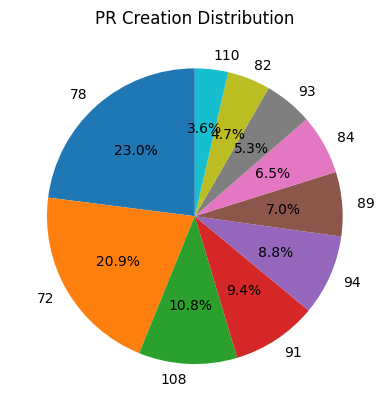

In [11]:
# Generating bar charts for each type
# Sorting the dataframe to get most PR creations

df1_sorted = df1.sort_values(by='COUNT(Issue.ID)', ascending=False)

# df1
plt.pie(df1_sorted['COUNT(Issue.ID)'].head(10), labels = df1_sorted['ID'].head(10), autopct='%1.1f%%', startangle=90)
plt.title('PR Creation Distribution')
plt.show()

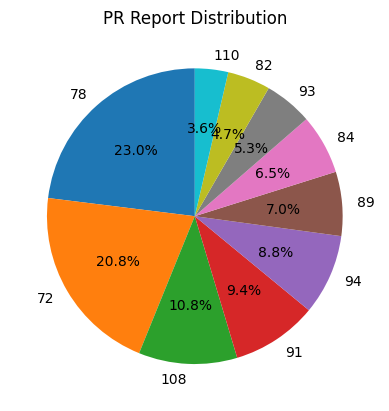

In [13]:
# Sorting the dataframe to get most PR reports

df2_sorted = df2.sort_values(by='COUNT(Issue.ID)', ascending=False)

plt.pie(df2_sorted['COUNT(Issue.ID)'].head(10), labels = df2_sorted['ID'].head(10), autopct='%1.1f%%', startangle=90)
plt.title('PR Report Distribution')
plt.show()

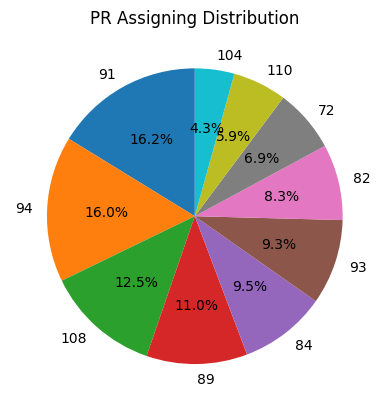

In [14]:
# Sorting the dataframe to get most PR reports

df3_sorted = df3.sort_values(by='COUNT(Issue.ID)', ascending=False)

plt.pie(df3_sorted['COUNT(Issue.ID)'].head(10), labels = df3_sorted['ID'].head(10), autopct='%1.1f%%', startangle=90)
plt.title('PR Assigning Distribution')
plt.show()